In [1]:
import cv2
import numpy as np
import os
from random import shuffle

ERROR! Session/line number was not unique in database. History logging moved to new session 126


In [2]:
train_DIR = 'C:\\Users\\USER\\Desktop\ML - Projects\\CatsVsDogs\\Data\\cats_and_dogs\\train'
test_DIR = 'C:\\Users\\USER\\Desktop\\ML - Projects\\CatsVsDogs\\Data\\cats_and_dogs\\validation'

In [3]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat':
        return [1, 0]
    else:
        return [0, 1]

In [4]:
def create_traing_dateset(img_size):
    data_train = []
    animals = ['cats', 'dogs']
    for animal in animals:
        for img in os.listdir(os.path.join(train_DIR, animal)):
            label = label_img(img)
            path = os.path.join(train_DIR, animal, img)
            img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (img_size, img_size))
            data_train.append([np.array(img), np.array(label)])
        
    shuffle(data_train)    
    return np.array(data_train)

In [5]:
def create_test_dataset(img_size):
    data_test = []
    animals = ['cats', 'dogs']
    for animal in animals:
        for img in os.listdir(os.path.join(test_DIR, animal)):
            label = label_img(img)
            path = os.path.join(test_DIR, animal, img)
            img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (img_size, img_size))
            data_test.append([np.array(img), np.array(label)])
            
    return np.array(data_test)

In [35]:
img_size = 128

train_data = create_traing_dateset(img_size)
test_data = create_test_dataset(img_size)

C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':
C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


In [7]:
# CREATING VALIDATION SET FROM A SUBSET OF TRAINING SET:

train = train_data[:-500]
val = train_data[-500:]

In [13]:
X_train = np.array([i[0] for i in train]).reshape(-1, img_size, img_size, 1)
y_train = np.array([i[1] for i in train])

print(X_train.shape)
print(y_train.shape)


X_val = np.array([i[0] for i in val]).reshape(-1, img_size, img_size, 1)
y_val = np.array([i[1] for i in val])

print(X_val.shape)
print(y_val.shape)

(1500, 64, 64, 1)
(1500, 2)
(500, 64, 64, 1)
(500, 2)
ERROR! Session/line number was not unique in database. History logging moved to new session 122


uint8
(64, 64, 1)


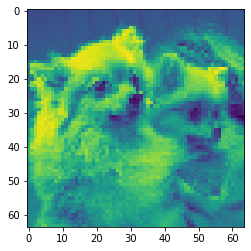

In [9]:
# VISUALIZATION (First we work with grayscale images):

from PIL import Image
from matplotlib import image
from matplotlib import pyplot

current_image = X_train[200]
print(current_image.dtype)
print(current_image.shape)
# display the array of pixels as an image
pyplot.imshow(current_image)
pyplot.show()

In [6]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10, cifar100
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

ERROR! Session/line number was not unique in database. History logging moved to new session 127


Using TensorFlow backend.


In [95]:
# DEFINE MODEL:

model1 = Sequential()

model1.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (128, 128, 1)))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(128, kernel_size = (5,5), activation = 'relu', padding = 'valid'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.25))

model1.add(Dense(128, activation='relu'))

model1.add(Dense(2, activation='softmax'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 128)       204928    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 128)      

In [97]:
# Without data augmentation:

model1.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(X_train, y_train, batch_size = 128, epochs=10, validation_data=(X_val, y_val))

ERROR! Session/line number was not unique in database. History logging moved to new session 85
Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 8s 5ms/sample - loss: 0.7105 - accuracy: 0.5960 - val_loss: 0.7473 - val_accuracy: 0.5880
Epoch 2/10
1500/1500 [==============================] - 29s 19ms/sample - loss: 0.6624 - accuracy: 0.6627 - val_loss: 1.0169 - val_accuracy: 0.6020
Epoch 3/10
1500/1500 [==============================] - 30s 20ms/sample - loss: 0.5878 - accuracy: 0.7007 - val_loss: 0.9225 - val_accuracy: 0.6120
Epoch 4/10
1500/1500 [==============================] - 30s 20ms/sample - loss: 0.5506 - accuracy: 0.7127 - val_loss: 1.9547 - val_accuracy: 0.5620
Epoch 5/10
1500/1500 [==============================] - 30s 20ms/sample - loss: 0.5178 - accuracy: 0.7480 - val_loss: 0.9040 - val_accuracy: 0.6320
Epoch 6/10
1500/1500 [==============================] - 30s 20ms/sample - loss: 0.4073 - accuracy: 0.8013 - val_loss: 1.

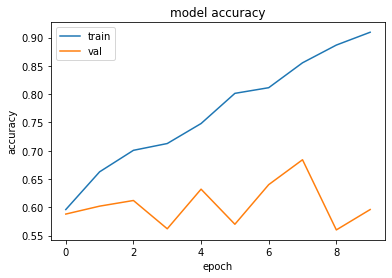

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

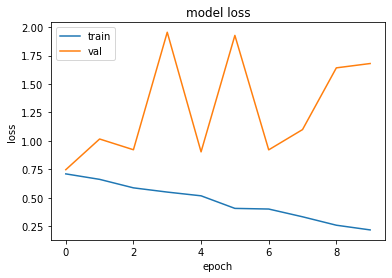

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [100]:
# Same model trained with DATA AUGMENTATION:

from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)


# fit model:
steps = int(X_train.shape[0] / 64)
model1.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(it_train, steps_per_epoch=steps, epochs=10, validation_data=(X_val, y_val))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 23 steps, validate on 500 samples
Epoch 1/10
23/23 [==============================] - 42s 2s/step - loss: 0.7719 - accuracy: 0.6031 - val_loss: 1.6711 - val_accuracy: 0.5200
Epoch 2/10
23/23 [==============================] - 29s 1s/step - loss: 0.7011 - accuracy: 0.5717 - val_loss: 0.6636 - val_accuracy: 0.6220
Epoch 3/10
23/23 [==============================] - 30s 1s/step - loss: 0.6576 - accuracy: 0.6189 - val_loss: 0.9837 - val_accuracy: 0.5840
Epoch 4/10
23/23 [==============================] - 29s 1s/step - loss: 0.6474 - accuracy: 0.6400 - val_loss: 0.8272 - val_accuracy: 0.5780
Epoch 5/10
23/23 [==============================] - 29s 1s/step - loss: 0.6405 - accuracy: 0.6309 - val_loss: 0.6592 - val_accuracy: 0.6360
Epoch 6/10
23/23 [==============================] - 29s 1s/step - loss: 0.6452 - accuracy: 0.6400 - val_loss: 0.6517 - val_accuracy: 0.6180
Epoch 7/10
23/23 [==============================] - 29s 1s/step - loss: 0.6464 - accuracy: 0.6462 - val_loss: 0.8917

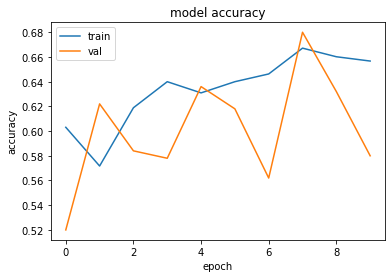

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

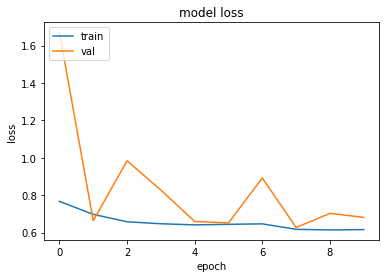

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [111]:
model1.save('C:\\Users\\USER\\Desktop\\ML - Projects\\CatsVsDogs\\model1')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
INFO:tensorflow:Assets written to: C:\Users\USER\Desktop\ML - Projects\CatsVsDogs\model1\assets


INFO:tensorflow:Assets written to: C:\Users\USER\Desktop\ML - Projects\CatsVsDogs\model1\assets


In [14]:
# Addressing the overfitting problem:

# DEFINE MODEL:

model2 = Sequential()

model2.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (128, 128, 1)))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())

model2.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())

model2.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())

model2.add(Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())

model2.add(Conv2D(512, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Dense(256, activation='relu'))

model2.add(Dense(2, activation='softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 64)       

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)


# fit model:
steps = int(X_train.shape[0] / 64)
model2.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(it_train, steps_per_epoch=steps, epochs=25, validation_data=(X_val, y_val))

  ...
    to  
  ['...']
Train for 23 steps, validate on 500 samples
Epoch 1/25
23/23 [==============================] - 23s 996ms/step - loss: 0.9093 - accuracy: 0.5494 - val_loss: 12.3938 - val_accuracy: 0.4960
Epoch 2/25
23/23 [==============================] - 13s 580ms/step - loss: 0.7556 - accuracy: 0.5982 - val_loss: 10.5783 - val_accuracy: 0.5040
Epoch 3/25
23/23 [==============================] - 17s 723ms/step - loss: 0.7023 - accuracy: 0.6072 - val_loss: 2.1634 - val_accuracy: 0.5100
Epoch 4/25
23/23 [==============================] - 17s 727ms/step - loss: 0.7685 - accuracy: 0.6052 - val_loss: 1.6677 - val_accuracy: 0.4960
Epoch 5/25
23/23 [==============================] - 17s 725ms/step - loss: 0.7008 - accuracy: 0.6198 - val_loss: 0.7582 - val_accuracy: 0.5720
Epoch 6/25
23/23 [==============================] - 17s 725ms/step - loss: 0.7239 - accuracy: 0.6302 - val_loss: 0.6471 - val_accuracy: 0.6380
Epoch 7/25
23/23 [==============================] - 17s 724ms/step - lo

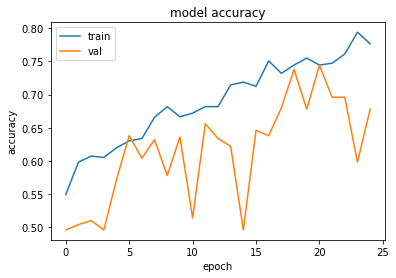

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

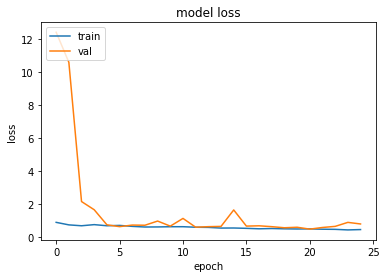

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
X_test = np.array([i[0] for i in test_data]).reshape(-1, img_size, img_size, 1)
y_test = np.array([i[1] for i in test_data])

print(X_test.shape)
print(y_test.shape)

predictions = model2.predict(X_test)
print(predictions.shape)

classes = tf.one_hot(tf.argmax(predictions, axis = 1), depth = 2)

print(classes.shape)

print(np.sum(classes == y_test) + np.sum(classes != y_test))

accuracy = np.sum(classes == y_test) / 4000
print(accuracy)

(1000, 128, 128, 1)
(1000, 2)
(1000, 2)
(1000, 2)
2000
0.3435


In [62]:
predictions2 = model2.predict(X_val)
print(predictions2.shape)

classes2 = tf.one_hot(tf.argmax(predictions2, axis = 1), depth = 2)

print(classes2.shape)
print(np.sum(classes2 == y_val) + np.sum(classes2 != y_val))
accuracy = np.sum(classes2 == y_val) / 1000
print(accuracy)

(500, 2)
(500, 2)
1000
0.678


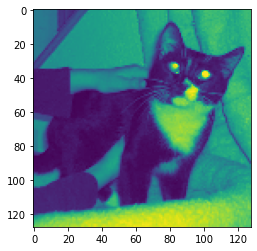

[0.4125365  0.58746356]
[1 0]


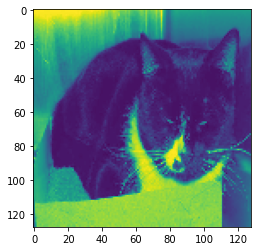

[0.22792119 0.7720788 ]
[1 0]


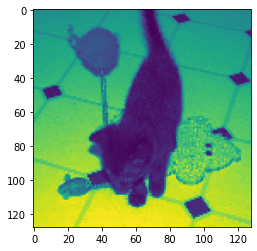

[0.12259237 0.8774076 ]
[1 0]


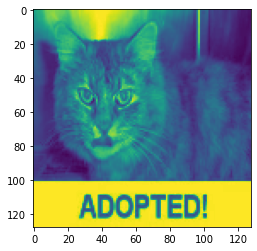

[0.6879705  0.31202948]
[1 0]


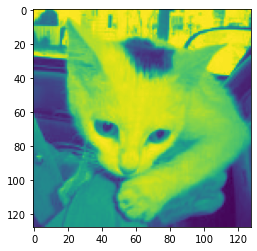

[0.0917452 0.9082548]
[1 0]


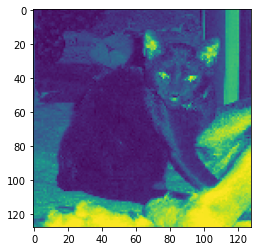

[0.9831897  0.01681029]
[1 0]


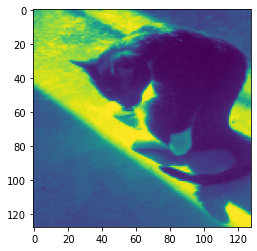

[0.19822755 0.8017725 ]
[1 0]


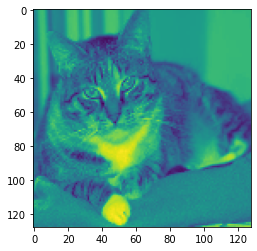

[0.996693   0.00330697]
[1 0]


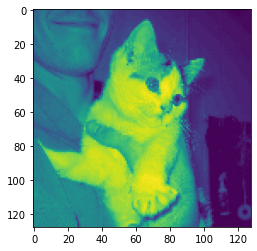

[0.48546466 0.5145353 ]
[1 0]


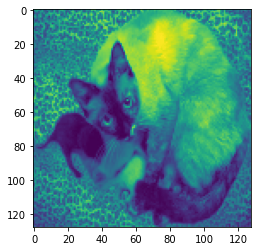

[0.05568384 0.94431615]
[1 0]


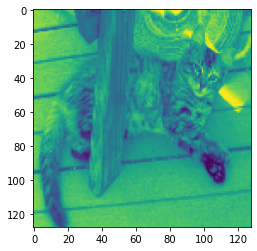

[0.61864066 0.38135937]
[1 0]


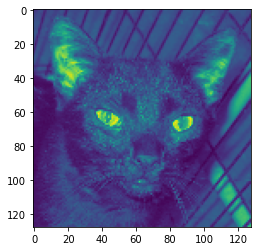

[0.9322328  0.06776723]
[1 0]


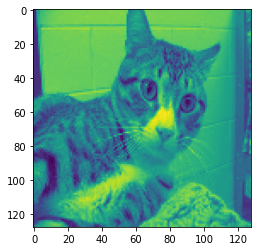

[0.8359396 0.1640604]
[1 0]


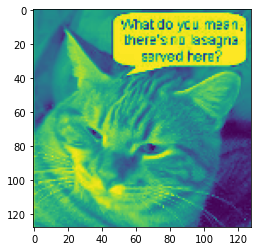

[0.4252173 0.5747827]
[1 0]


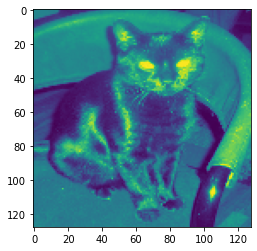

[0.03890496 0.9610951 ]
[1 0]


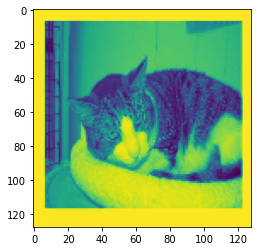

[0.4711196 0.5288804]
[1 0]


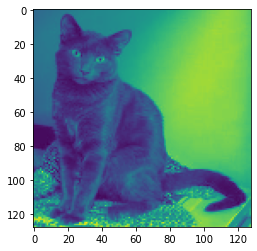

[0.8620215  0.13797852]
[1 0]


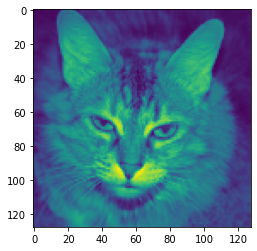

[0.85727394 0.14272608]
[1 0]


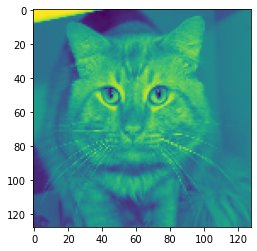

[0.90611327 0.09388679]
[1 0]


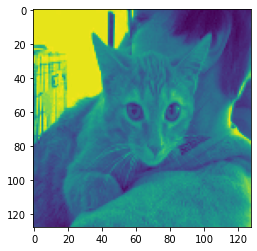

[0.20465441 0.79534554]
[1 0]


In [64]:
for index in range(0, 20):
    current_image = X_test[index]
    pyplot.imshow(current_image)
    pyplot.show()

    print(predictions[index])
    print(y_test[index])

In [71]:
model2.save('C:\\Users\\USER\\Desktop\\ML - Projects\\CatsVsDogs\\model2')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: C:\Users\USER\Desktop\ML - Projects\CatsVsDogs\model2\assets


INFO:tensorflow:Assets written to: C:\Users\USER\Desktop\ML - Projects\CatsVsDogs\model2\assets


In [7]:
# Now, the image sizes will be reduced to 64 x 64

img_size = 64

train_data = create_traing_dateset(img_size)
test_data = create_test_dataset(img_size)

train = train_data[:-500]
val = train_data[-500:]

X_train = np.array([i[0] for i in train]).reshape(-1, img_size, img_size, 1)
y_train = np.array([i[1] for i in train])

X_val = np.array([i[0] for i in val]).reshape(-1, img_size, img_size, 1)
y_val = np.array([i[1] for i in val])

print(X_train.shape)

X_test = np.array([i[0] for i in test_data]).reshape(-1, img_size, img_size, 1)
y_test = np.array([i[1] for i in test_data])

print(X_test.shape)

print(np.sum(y_train == y_test))

C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


(1500, 64, 64, 1)
(1000, 64, 64, 1)
0


C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()
C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [27]:
# Exact same model as model2(), but now the input is 64 x 64

model3 = Sequential()

model3.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (64, 64, 1)))
model3.add(MaxPool2D(pool_size=(2,2)))
# model3.add(BatchNormalization())

model3.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
# model3.add(BatchNormalization())

model3.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
# model3.add(BatchNormalization())

model3.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
# model3.add(BatchNormalization())

model3.add(Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
# model3.add(BatchNormalization())

model3.add(Conv2D(512, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
# model3.add(BatchNormalization())

model3.add(Flatten())

model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.2))
# model3.add(BatchNormalization())

model3.add(Dense(256, activation='relu'))

model3.add(Dense(2, activation='softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 128)        

In [18]:
# WIHTOUT BatchNormalization, the training accuracy and validation accuracy are similar and tend to get better with epochs

# **TASK1**: Run for 100 epochs
# ** TASK2**: Run for 200 epochs with 2 BN layers

from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)


# fit model:
steps = int(X_train.shape[0] / 64)
model3.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model3.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(X_val, y_val))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 23 steps, validate on 500 samples
Epoch 1/100
23/23 [==============================] - 5s 236ms/step - loss: 2.0885 - accuracy: 0.5132 - val_loss: 0.7109 - val_accuracy: 0.4800
Epoch 2/100
23/23 [==============================] - 1s 60ms/step - loss: 0.6983 - accuracy: 0.5014 - val_loss: 0.6901 - val_accuracy: 0.5180
Epoch 3/100
23/23 [==============================] - 1s 61ms/step - loss: 0.6892 - accuracy: 0.5508 - val_loss: 0.7063 - val_accuracy: 0.4820
Epoch 4/100
23/23 [==============================] - 1s 61ms/step - loss: 0.6883 - accuracy: 0.5446 - val_loss: 0.6860 - val_accuracy: 0.5240
Epoch 5/100
23/23 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.54 - 1s 62ms/step - loss: 0.6939 - accuracy: 0.5432 - val_loss: 0.6942 - val_accuracy: 0.4820
Epoch 6/100
23/23 [==============================] - 1s 61ms/step - loss: 0.6922 - accuracy: 0.5251 - val_loss: 0.6990 - val_accuracy: 0.5200
Epoch 7/100
23/23 [==============================] - 1s 62ms/

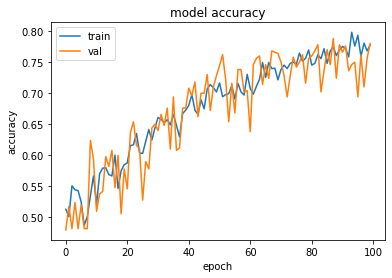

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

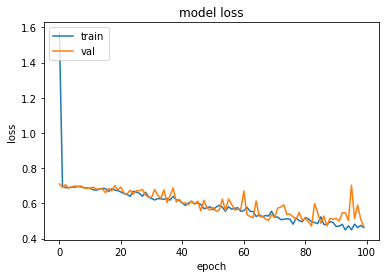

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
# Model loss and accuracy get better with 100 epochs, now train for 200 epochs and add 2 BN layers to the model

from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)


# fit model:
steps = int(X_train.shape[0] / 64)
model3.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model3.fit(it_train, steps_per_epoch=steps, epochs=200, validation_data=(X_val, y_val))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 23 steps, validate on 500 samples
Epoch 1/200
23/23 [==============================] - 2s 102ms/step - loss: 0.7425 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5220
Epoch 2/200
23/23 [==============================] - 1s 64ms/step - loss: 0.6934 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.4860
Epoch 3/200
23/23 [==============================] - 1s 63ms/step - loss: 0.6864 - accuracy: 0.5487 - val_loss: 0.6897 - val_accuracy: 0.5280
Epoch 4/200
23/23 [==============================] - 1s 63ms/step - loss: 0.6729 - accuracy: 0.5940 - val_loss: 0.6860 - val_accuracy: 0.5540
Epoch 5/200
23/23 [==============================] - 2s 66ms/step - loss: 0.6699 - accuracy: 0.5884 - val_loss: 0.6890 - val_accuracy: 0.5740
Epoch 6/200
23/23 [==============================] - 2s 82ms/step - loss: 0.6531 - accuracy: 0.6191 - val_loss: 0.6739 - val_accuracy: 0.6100
Epoch 7/200
23/23 [==============================] - 4s 169ms/step - loss: 0.6710 - accuracy: 0.5884 - 

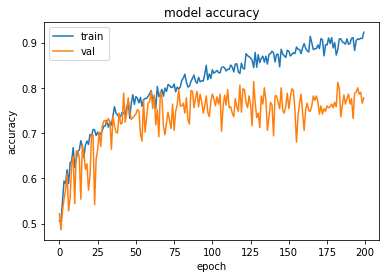

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

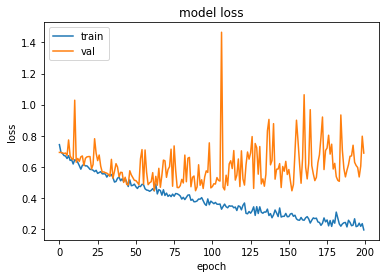

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
# With 2 BN layers, model overfits after 100 epochs, model achieves peak performance at around 100 epochs

In [28]:
# Now remove the 2 BN layers and reduce the learning rate 3 to 0.0003
# Training for 200 epochs

from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)


# fit model:
steps = int(X_train.shape[0] / 64)
model3.compile(optimizer=Adam(learning_rate=0.0003),loss='categorical_crossentropy',metrics=['accuracy'])
history = model3.fit(it_train, steps_per_epoch=steps, epochs=200, validation_data=(X_val, y_val))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 23 steps, validate on 500 samples
Epoch 1/200
23/23 [==============================] - 2s 93ms/step - loss: 1.1271 - accuracy: 0.5111 - val_loss: 0.6892 - val_accuracy: 0.4940
Epoch 2/200
23/23 [==============================] - 1s 62ms/step - loss: 0.7001 - accuracy: 0.5216 - val_loss: 0.6772 - val_accuracy: 0.6100
Epoch 3/200
23/23 [==============================] - 1s 61ms/step - loss: 0.6854 - accuracy: 0.5536 - val_loss: 0.6599 - val_accuracy: 0.6360
Epoch 4/200
23/23 [==============================] - 1s 62ms/step - loss: 0.6830 - accuracy: 0.5467 - val_loss: 0.6585 - val_accuracy: 0.6360
Epoch 5/200
23/23 [==============================] - 1s 62ms/step - loss: 0.6684 - accuracy: 0.5815 - val_loss: 0.6437 - val_accuracy: 0.6520
Epoch 6/200
23/23 [==============================] - 1s 64ms/step - loss: 0.6573 - accuracy: 0.6205 - val_loss: 0.6362 - val_accuracy: 0.6600
Epoch 7/200
23/23 [==============================] - 2s 75ms/step - loss: 0.6621 - accuracy: 0.6080 - va

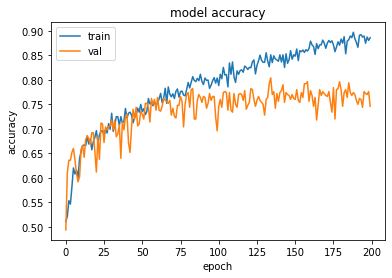

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

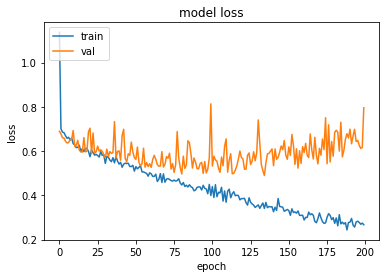

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
# In conclusion, the model with 2 BN layers performs better.

model_avg = np.sum(history.history['val_accuracy'][90:110]) / 20
print('Peak Model accuracy on validation set (without 2 BN layers) with LR = 0.0003: ', model_avg * 100)

Peak Model accuracy on validation set (without 2 BN layers) with LR = 0.0003:  75.32000064849854


In [41]:
X_test = np.array([i[0] for i in test_data]).reshape(-1, img_size, img_size, 1)
y_test = np.array([i[1] for i in test_data])

print(X_test.shape)
print(y_test.shape)

predictions = model3.predict(X_test)
print(predictions.shape)

classes = tf.one_hot(tf.argmax(predictions, axis = 1), depth = 2)

print(classes.shape)

print(np.sum(classes == y_test) + np.sum(classes != y_test))

accuracy = np.sum(classes == y_test) / 2000    # Divide by 2 * 1000 as classes == y_test provides a (1000, 2) matrix
print('Accuracy on the testing set is: ', accuracy * 100)

(1000, 64, 64, 1)
(1000, 2)
(1000, 2)
(1000, 2)
2000
Accuracy on the testing set is:  75.6


In [43]:
model3.save('C:\\Users\\USER\\Desktop\\ML - Projects\\CatsVsDogs\\model3_75.6')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
INFO:tensorflow:Assets written to: C:\Users\USER\Desktop\ML - Projects\CatsVsDogs\model3_75.6\assets


INFO:tensorflow:Assets written to: C:\Users\USER\Desktop\ML - Projects\CatsVsDogs\model3_75.6\assets


In [11]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat':
        return [1, 0]
    else:
        return [0, 1]

In [14]:
def create_traing_dateset(img_size):
    data_train = []
    animals = ['cats', 'dogs']
    for animal in animals:
        for img in os.listdir(os.path.join(train_DIR, animal)):
            label = label_img(img)
            path = os.path.join(train_DIR, animal, img)
            img = cv2.resize(cv2.imread(path, cv2.IMREAD_COLOR), (img_size, img_size))
            data_train.append([np.array(img), np.array(label)])
        
    shuffle(data_train)    
    return np.array(data_train)

In [15]:
def create_test_dataset(img_size):
    data_test = []
    animals = ['cats', 'dogs']
    for animal in animals:
        for img in os.listdir(os.path.join(test_DIR, animal)):
            label = label_img(img)
            path = os.path.join(test_DIR, animal, img)
            img = cv2.resize(cv2.imread(path, cv2.IMREAD_COLOR), (img_size, img_size))
            data_test.append([np.array(img), np.array(label)])
            
    return np.array(data_test)

ERROR! Session/line number was not unique in database. History logging moved to new session 130


In [16]:
# Now, the image sizes will be reduced to 64 x 64

img_size = 64

train_data = create_traing_dateset(img_size)
test_data = create_test_dataset(img_size)

train = train_data[:-500]
val = train_data[-500:]

X_train = np.array([i[0] for i in train]).reshape(-1, img_size, img_size, 3)
y_train = np.array([i[1] for i in train])

X_val = np.array([i[0] for i in val]).reshape(-1, img_size, img_size, 3)
y_val = np.array([i[1] for i in val])

print(X_train.shape)

X_test = np.array([i[0] for i in test_data]).reshape(-1, img_size, img_size, 3)
y_test = np.array([i[1] for i in test_data])

print(X_test.shape)

print(np.sum(y_train == y_test))

ERROR! Session/line number was not unique in database. History logging moved to new session 131


C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


(1500, 64, 64, 3)
(1000, 64, 64, 3)
0


C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()
C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


uint8
(64, 64, 3)


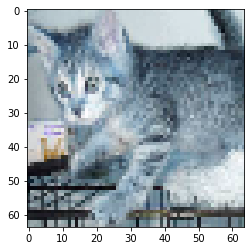

In [30]:
# VISUALIZATION of new dataset images:

from PIL import Image
from matplotlib import image
from matplotlib import pyplot

current_image = X_train[123]
print(current_image.dtype)
print(current_image.shape)
# display the array of pixels as an image
pyplot.imshow(current_image)
pyplot.show()

In [44]:
from tensorflow.keras.applications.resnet50 import ResNet50

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3), pooling = 'max')

for layer in resnet_model.layers:
   layer.trainable = False
for layer in resnet_model.layers[-6:]:
   layer.trainable = True

# **IMPORTANT**
# let's visualize layer names and layer indices to see how many layers we should freeze:
# for i, layer in enumerate(resnet_model.layers):
#    print(i, layer.name)

model4 = Sequential()
model4.add(resnet_model)

model4.add(Flatten())

model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.20))
model4.add(BatchNormalization())

model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.20))
model4.add(BatchNormalization())

model4.add(Dense(2, activation='softmax'))

model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_25 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)              

In [48]:
# Training model built using transfer learning from resnet 50 and fine tuning parameters of the last 6 layers:

from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)

# Training for 50 + 50 epochs (loss seems to decrease even after 50 epochs, so we let it run for another 50)

# fit model:
steps = int(X_train.shape[0] / 64)
model4.compile(optimizer=Adam(learning_rate=0.0003),loss='categorical_crossentropy',metrics=['accuracy'])
history = model4.fit(it_train, steps_per_epoch=steps, epochs=50, validation_data=(X_val, y_val))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 23 steps, validate on 500 samples
Epoch 1/50
23/23 [==============================] - 21s 923ms/step - loss: 0.3351 - accuracy: 0.8579 - val_loss: 0.8013 - val_accuracy: 0.7220
Epoch 2/50
23/23 [==============================] - 10s 419ms/step - loss: 0.3247 - accuracy: 0.8705 - val_loss: 0.8946 - val_accuracy: 0.7100
Epoch 3/50
23/23 [==============================] - 20s 878ms/step - loss: 0.3318 - accuracy: 0.8546 - val_loss: 0.7324 - val_accuracy: 0.7540
Epoch 4/50
23/23 [==============================] - 20s 865ms/step - loss: 0.2970 - accuracy: 0.8795 - val_loss: 0.8290 - val_accuracy: 0.7380
Epoch 5/50
23/23 [==============================] - 20s 865ms/step - loss: 0.3008 - accuracy: 0.8760 - val_loss: 0.8934 - val_accuracy: 0.7280
Epoch 6/50
23/23 [==============================] - 20s 863ms/step - loss: 0.2855 - accuracy: 0.8851 - val_loss: 0.8816 - val_accuracy: 0.7540
Epoch 7/50
23/23 [==============================] - 20s 864ms/step - loss: 0.2676 - accuracy: 0.88

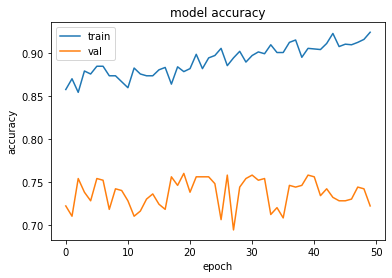

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

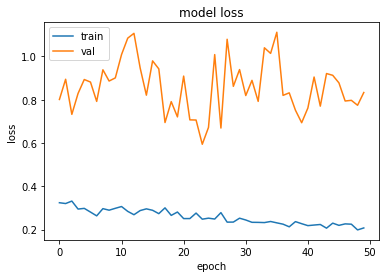

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
# Model fits after around 50 + 25 epochs


model_avg = np.sum(history.history['val_accuracy'][20:30]) / 10
print('For model4: Average Peak Model accuracy on validation set: ', model_avg * 100)

For model4: Average Peak Model accuracy on validation set:  74.10000324249268


In [52]:
# On Test Set:

X_test = np.array([i[0] for i in test_data]).reshape(-1, img_size, img_size, 3)
y_test = np.array([i[1] for i in test_data])

print(X_test.shape)
print(y_test.shape)

predictions = model4.predict(X_test)
print(predictions.shape)

classes = tf.one_hot(tf.argmax(predictions, axis = 1), depth = 2)

print(classes.shape)

print(np.sum(classes == y_test) + np.sum(classes != y_test))

accuracy = np.sum(classes == y_test) / 2000    # Divide by 2 * 1000 as classes == y_test provides a (1000, 2) matrix
print('Accuracy on the testing set is: ', accuracy * 100)

(1000, 64, 64, 3)
(1000, 2)
(1000, 2)
(1000, 2)
2000
Accuracy on the testing set is:  77.10000000000001


In [55]:
model4.save('C:\\Users\\USER\\Desktop\\ML - Projects\\CatsVsDogs\\model4_TransferLearning_77.1')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
INFO:tensorflow:Assets written to: C:\Users\USER\Desktop\ML - Projects\CatsVsDogs\model4_TransferLearning_77.1\assets


INFO:tensorflow:Assets written to: C:\Users\USER\Desktop\ML - Projects\CatsVsDogs\model4_TransferLearning_77.1\assets


In [36]:
# Model achieves 77.1% accuracy on testing set by using Transfer Learning and Fine Tuning
# But this might as well be due to inclusion of RGB images in the datasets
# So, we shall train the dataset on model3 (previous best, 75.6), to confirm our interpretation
# We also add 2 BN layers

model5 = Sequential()

model5.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)))
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(BatchNormalization())

model5.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(BatchNormalization())

model5.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model5.add(MaxPool2D(pool_size=(2,2)))
# model5.add(BatchNormalization())

model5.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model5.add(MaxPool2D(pool_size=(2,2)))
# model5.add(BatchNormalization())

model5.add(Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model5.add(MaxPool2D(pool_size=(2,2)))
# model5.add(BatchNormalization())

model5.add(Conv2D(512, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model5.add(MaxPool2D(pool_size=(2,2)))
# model5.add(BatchNormalization())

model5.add(Flatten())

model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.2))
# model5.add(BatchNormalization())

model5.add(Dense(256, activation='relu'))

model5.add(Dense(2, activation='softmax'))

model5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)       

In [32]:
# Training for 100 epochs

model5.compile(optimizer=Adam(learning_rate=0.0003),loss='categorical_crossentropy',metrics=['accuracy'])
history = model5.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(X_val, y_val))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 23 steps, validate on 500 samples
Epoch 1/100
23/23 [==============================] - 5s 220ms/step - loss: 0.6910 - accuracy: 0.5564 - val_loss: 0.7057 - val_accuracy: 0.5100
Epoch 2/100
23/23 [==============================] - 2s 70ms/step - loss: 0.6694 - accuracy: 0.5870 - val_loss: 0.7267 - val_accuracy: 0.5060
Epoch 3/100
23/23 [==============================] - 2s 90ms/step - loss: 0.6494 - accuracy: 0.5912 - val_loss: 0.6896 - val_accuracy: 0.5540
Epoch 4/100
23/23 [==============================] - 5s 238ms/step - loss: 0.6301 - accuracy: 0.6525 - val_loss: 0.6711 - val_accuracy: 0.5620
Epoch 5/100
23/23 [==============================] - 5s 237ms/step - loss: 0.6473 - accuracy: 0.6219 - val_loss: 0.6407 - val_accuracy: 0.6540
Epoch 6/100
23/23 [==============================] - 6s 239ms/step - loss: 0.6281 - accuracy: 0.6337 - val_loss: 0.6248 - val_accuracy: 0.6760
Epoch 7/100
23/23 [==============================] - 5s 237ms/step - loss: 0.6084 - accuracy: 0.6609

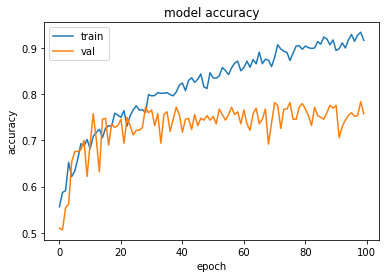

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

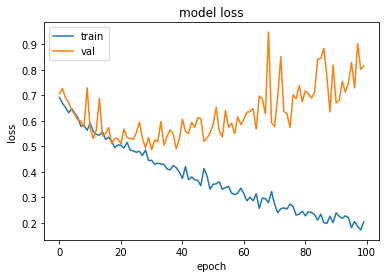

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
# Again, the model overfits at around 30 epochs
# So we train for 35 epochs so that model attains peak perfomance

# Training for 35 epochs:

model5.compile(optimizer=Adam(learning_rate=0.0003),loss='categorical_crossentropy',metrics=['accuracy'])
history = model5.fit(it_train, steps_per_epoch=steps, epochs=35, validation_data=(X_val, y_val))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 23 steps, validate on 500 samples
Epoch 1/35
23/23 [==============================] - 3s 123ms/step - loss: 0.6938 - accuracy: 0.5418 - val_loss: 0.9036 - val_accuracy: 0.5000
Epoch 2/35
23/23 [==============================] - 4s 172ms/step - loss: 0.6597 - accuracy: 0.5926 - val_loss: 0.7372 - val_accuracy: 0.5280
Epoch 3/35
23/23 [==============================] - 5s 238ms/step - loss: 0.6475 - accuracy: 0.6240 - val_loss: 0.7203 - val_accuracy: 0.5400
Epoch 4/35
23/23 [==============================] - 6s 239ms/step - loss: 0.6262 - accuracy: 0.6483 - val_loss: 0.6820 - val_accuracy: 0.5560
Epoch 5/35
23/23 [==============================] - 5s 239ms/step - loss: 0.6199 - accuracy: 0.6546 - val_loss: 0.6520 - val_accuracy: 0.6020
Epoch 6/35
23/23 [==============================] - 6s 239ms/step - loss: 0.6121 - accuracy: 0.6630 - val_loss: 0.7962 - val_accuracy: 0.5240
Epoch 7/35
23/23 [==============================] - 5s 238ms/step - loss: 0.6283 - accuracy: 0.6504 - va

In [41]:
# Model fits after around 25 epochs


model_avg = np.sum(history.history['val_accuracy'][25:35]) / 10
print('For model4: Average Peak Model accuracy on validation set: ', model_avg * 100)

For model4: Average Peak Model accuracy on validation set:  71.56000137329102


In [43]:
# On Test Set:

X_test = np.array([i[0] for i in test_data]).reshape(-1, img_size, img_size, 3)
y_test = np.array([i[1] for i in test_data])

print(X_test.shape)
print(y_test.shape)

predictions = model5.predict(X_test)
print(predictions.shape)

classes = tf.one_hot(tf.argmax(predictions, axis = 1), depth = 2)

print(classes.shape)

print(np.sum(classes == y_test) + np.sum(classes != y_test))

accuracy = np.sum(classes == y_test) / 2000    # Divide by 2 * 1000 as classes == y_test provides a (1000, 2) matrix
print('Accuracy on the testing set is: ', accuracy * 100)

(1000, 64, 64, 3)
(1000, 2)
(1000, 2)
(1000, 2)
2000
Accuracy on the testing set is:  72.2


In [ ]:
# We conclude that the model4 is in fact a good model which achieves 77.1% accuracy on the testing set
# Hence, in conclusion, we realize the power of transfer learningand fine tuning